In [1]:
import cv2

from IPython.display import display, clear_output
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

from urllib.request import urlopen
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)

    # return the image
    return image



Text(0.5, 1.0, 'Baboon')

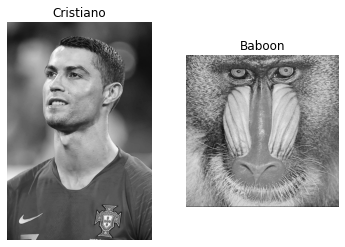

In [2]:
#read the images
cristiano = url_to_image('https://upload.wikimedia.org/wikipedia/commons/8/8c/Cristiano_Ronaldo_2018.jpg')
fig, ax = plt.subplots(1, 2)
clear_output()
ax[0].imshow(cv2.cvtColor(cristiano, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Cristiano')

baboon = url_to_image('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png')
ax[1].imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Baboon')

(-0.5, 613.5, 920.5, -0.5)

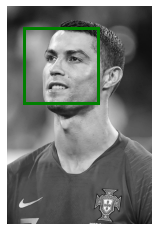

In [3]:
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)
##Convert frame to grayscale
gray_cristiano = cv2.cvtColor(cristiano, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(
    gray_cristiano,
    scaleFactor=1.1,
    minNeighbors=6,
    minSize=(100, 100),
    flags=cv2.CASCADE_SCALE_IMAGE
)
# output of the classifier
faces
#visualize the outcome of the algorithm
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.imshow(gray_cristiano, cmap='gray')

# iterate over all the detected faces
for face in faces:
    # retrieve the coordinates of the position of the current face, and its size
    (x_smile, y_smile, w_smile, h_smile) = face
    # draw a rectangle where the face is detected
    ax.add_artist(Rectangle((x_smile, y_smile), w_smile, h_smile, fill=False, lw=3, color='green'))

ax.axis('off')